### BANA 212 Group Project: Code

<b> GROUP 4 </b>
* Ankit Jain
* Casey Kan
* Dido Chang
* Sijia Li
* Song Han

Data Source: https://bikeshare.metro.net/about/data/

In [1]:
# Imported Modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import numpy as np
import datetime
import urllib.parse
import urllib.request
import csv
import codecs

In [2]:
# Change Working Directory according to your computer based on where the 4 datasets are located
os.chdir(os.path.dirname('C:/Users/jaina/OneDrive/Desktop/UCI/GRADUATE/FALL QUARTER/BANA 212/Group Project/Datasets/metro-bike-2020-q1.csv'))

### Code for Extracting Weather Data using API 
* Code used for Reference: https://github.com/visualcrossing/WeatherApi/blob/master/python_samples/loading_historical_weather_data_into_python.py
* API Source: https://www.visualcrossing.com/weather-api
* <b> Note: Try to run program only few times in a day as otherwise payment is required for every other API Call (Limit is 100 times for free account per day) </b>

In [3]:
# Creating URL with API to extract weather data
API_KEY = 'GAJRM2P42SDR58UAF822HALC3'
BASE_URL = 'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/'
QueryLocation = '&location=' + urllib.parse.quote('Los Angeles, CA')
QueryDate = '&startDateTime=2020-01-01T00:00:00&endDateTime=2020-09-30T00:00:00'
URL = BASE_URL + 'history?&aggregateHours=24&unitGroup=us&dayStartTime=0:0:00&dayEndTime=0:0:00' + QueryDate + QueryLocation + '&key=' + API_KEY
CSV_Output = csv.reader(codecs.iterdecode(urllib.request.urlopen(URL), 'utf-8')) # Converts content of URL to usable CSV Form

In [4]:
# Converting data to usable form and adding to weather dataframe
data = defaultdict(list)
for Row in CSV_Output:
    # Adds the relevant data columns to the dictionary with appropriate keys
    data['Date'].append(Row[1])
    data['Minimum Temperature'].append(Row[2])
    data['Maximum Temperature'].append(Row[3])
    data['Average Temperature'].append(Row[4])
    data['Relative Humidity(%)'].append(Row[6])
    data['Precipitation'].append(Row[12])
    data['Visibility (in miles)'].append(Row[15])
    data['Cloud Cover (%)'].append(Row[16])
    data['Conditions'].append(Row[24])    
weather_data = pd.DataFrame(dict(data), columns = list(data.keys()))[1:] # Converts dictionary to dataset
weather_data = weather_data.reset_index(drop = True)
weather_data.to_csv('weather.csv', index = False)
weather_data

,Date,Minimum Temperature,Maximum Temperature,Average Temperature,Relative Humidity(%),Precipitation,Visibility (in miles),Cloud Cover (%),Conditions
0,01/01/2020,50.0,69.9,59.6,48.56,0.0,9.5,0.0,Clear
1,01/02/2020,51.2,69.0,58.9,69.55,0.0,8.7,7.1,Clear
2,01/03/2020,51.9,74.7,61.3,52.48,0.0,9.8,0.0,Clear
3,01/04/2020,49.9,70.9,58.7,63.4,0.0,8.7,0.0,Clear
4,01/05/2020,48.8,70.9,58.3,59.24,0.0,9.3,0.0,Clear
...,...,...,...,...,...,...,...,...,...
269,09/26/2020,65.9,80.0,71.2,73.51,0.0,6.9,35.5,Partially cloudy
270,09/27/2020,68.0,79.8,72.2,71.22,0.0,7.4,55.5,Partially cloudy
271,09/28/2020,65.9,84.6,73.1,71.72,0.0,7.1,18.7,Clear
272,09/29/2020,65.9,92.4,75.2,67.28,0.0,6.9,36.4,Partially cloudy


In [5]:
# Importing Quarter and Station Datasets
quarter_1 = pd.read_csv('metro-bike-2020-q1.csv')
quarter_2 = pd.read_csv('metro-bike-2020-q2.csv')
quarter_3 = pd.read_csv('metro-bike-2020-q3.csv')
stations = pd.read_csv('metro-bike-share-stations-2020-10-01.csv')

In [6]:
# Function to return station from Stations dataset based on station ID
def station_finder(id):
    return list(stations[stations.Station_ID == np.int64(id)]['Station_Name'])[0]

In [7]:
# Function to find dictionary key based on item 
def key_finder(given_dict, item):
    for key in given_dict.keys():
        if given_dict[key] == item:
            return key

In [8]:
# Function returning attribute with maximum occuruences in a given list
def max_returner(given_list):
    counts = [given_list.count(x) for x in given_list]
    for i in given_list:
        if max(counts) == given_list.count(i):
            return i

In [9]:
# Converting date and station attributes to usable form and adding additional columns from quarter data
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
q = 1
for dataset in [quarter_1, quarter_2, quarter_3]:
    print('Processing Quarter {} Dataset'.format(q))
    dataset['start_date'] = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M").date() for x in dataset['start_time']]
    dataset['end_date'] = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M").date() for x in dataset['end_time']]
    dataset['month'] = [months[x.month] for x in dataset['start_date']]
    dataset['starting_station_name'] = [station_finder(x) for x in dataset.start_station]
    dataset['ending_station_name'] = [station_finder(x) for x in dataset.end_station]
    q += 1
print('Processing Completed')

Processing Quarter 1 Dataset
Processing Quarter 2 Dataset
Processing Quarter 3 Dataset
Processing Completed


In [10]:
# Converting weather dates to usable form and adding additional columns from weather data
weather_data['Date'] = [datetime.datetime.strptime(x, "%m/%d/%Y").date() for x in weather_data['Date']]
weather_data['Month'] = [months[x.month] for x in weather_data['Date']]
weather_data

,Date,Minimum Temperature,Maximum Temperature,Average Temperature,Relative Humidity(%),Precipitation,Visibility (in miles),Cloud Cover (%),Conditions,Month
0,2020-01-01,50.0,69.9,59.6,48.56,0.0,9.5,0.0,Clear,January
1,2020-01-02,51.2,69.0,58.9,69.55,0.0,8.7,7.1,Clear,January
2,2020-01-03,51.9,74.7,61.3,52.48,0.0,9.8,0.0,Clear,January
3,2020-01-04,49.9,70.9,58.7,63.4,0.0,8.7,0.0,Clear,January
4,2020-01-05,48.8,70.9,58.3,59.24,0.0,9.3,0.0,Clear,January
...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,65.9,80.0,71.2,73.51,0.0,6.9,35.5,Partially cloudy,September
270,2020-09-27,68.0,79.8,72.2,71.22,0.0,7.4,55.5,Partially cloudy,September
271,2020-09-28,65.9,84.6,73.1,71.72,0.0,7.1,18.7,Clear,September
272,2020-09-29,65.9,92.4,75.2,67.28,0.0,6.9,36.4,Partially cloudy,September


In [11]:
# Merging data of all quarters
quarter_1_to_3 = pd.concat([quarter_1, quarter_2, quarter_3])
quarter_1_to_3 = quarter_1_to_3.reset_index(drop = True)
quarter_1_to_3.drop(['start_lat','start_lon','end_lat','end_lon'], axis=1,inplace = True)
quarter_1_to_3

,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_date,end_date,month,starting_station_name,ending_station_name
0,134867493,25,1/1/2020 0:16,1/1/2020 0:41,3063,4491,18419,30,One Way,Monthly Pass,electric,2020-01-01,2020-01-01,January,Pershing Square,Main & Winston
1,134867799,35,1/1/2020 0:24,1/1/2020 0:59,4285,4354,15661,1,One Way,One Day Pass,smart,2020-01-01,2020-01-01,January,Metro Bike Share Free Bikes,Venice & Glendon
2,134868104,37,1/1/2020 0:31,1/1/2020 1:08,4344,4322,15848,1,One Way,Walk-up,smart,2020-01-01,2020-01-01,January,Downtown Santa Monica Expo Line Station,Venice & Inglewood
3,134868103,36,1/1/2020 0:32,1/1/2020 1:08,4344,4322,16053,1,One Way,Walk-up,smart,2020-01-01,2020-01-01,January,Downtown Santa Monica Expo Line Station,Venice & Inglewood
4,134868102,35,1/1/2020 0:33,1/1/2020 1:08,4344,4322,15694,1,One Way,Walk-up,smart,2020-01-01,2020-01-01,January,Downtown Santa Monica Expo Line Station,Venice & Inglewood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172092,148178736,43,9/30/2020 23:04,9/30/2020 23:47,4301,4301,12200,1,Round Trip,Walk-up,standard,2020-09-30,2020-09-30,September,Maubert & Vermont,Maubert & Vermont
172093,148178233,18,9/30/2020 23:07,9/30/2020 23:25,4302,4390,20200,30,One Way,Monthly Pass,standard,2020-09-30,2020-09-30,September,Vermont Pl & Vermont,Kenmore & 3rd
172094,148178633,10,9/30/2020 23:31,9/30/2020 23:41,3023,3031,12135,30,One Way,Monthly Pass,standard,2020-09-30,2020-09-30,September,1st & Judge John Aiso,7th & Spring
172095,148178733,7,9/30/2020 23:41,9/30/2020 23:48,3027,3067,12215,1,One Way,Walk-up,standard,2020-09-30,2020-09-30,September,Spring & 3rd,Main & 6th


In [12]:
# Constructing Table to see the number of bike types in each quarter
bike_types_dict = defaultdict(list)
for bike_type in list(set(quarter_1_to_3.bike_type)):
    bike_types_dict['Type of Bike'].append(bike_type)
    bike_types_dict['Quarter 1'].append(list(quarter_1.bike_type).count(bike_type))
    bike_types_dict['Quarter 2'].append(list(quarter_2.bike_type).count(bike_type))
    bike_types_dict['Quarter 3'].append(list(quarter_3.bike_type).count(bike_type))
    bike_types_dict['Total'].append(list(quarter_1_to_3.bike_type).count(bike_type))
bike_types_dict = dict(bike_types_dict)    
bike_types_count = pd.DataFrame(bike_types_dict, columns = list(bike_types_dict.keys()))
bike_types_count

,Type of Bike,Quarter 1,Quarter 2,Quarter 3,Total
0,standard,33153,20279,20412,73844
1,smart,9619,11062,7549,28230
2,electric,33619,22861,13543,70023


In [13]:
# Constructing Table to see the number of passholder types in each quarter
passholder_type_dict = defaultdict(list)
for passholder_type in list(set(quarter_1_to_3.passholder_type)):
    passholder_type_dict['Type of Passholder'].append(passholder_type)
    passholder_type_dict['Quarter 1'].append(list(quarter_1.passholder_type).count(passholder_type))
    passholder_type_dict['Quarter 2'].append(list(quarter_2.passholder_type).count(passholder_type))
    passholder_type_dict['Quarter 3'].append(list(quarter_3.passholder_type).count(passholder_type))
    passholder_type_dict['Total'].append(list(quarter_1_to_3.passholder_type).count(passholder_type))
passholder_type_dict = dict(passholder_type_dict)    
passholder_type_count = pd.DataFrame(passholder_type_dict, columns = list(passholder_type_dict.keys()))
passholder_type_count

,Type of Passholder,Quarter 1,Quarter 2,Quarter 3,Total
0,Walk-up,10921,10814,9700,31435
1,Monthly Pass,51560,34787,23089,109436
2,Annual Pass,9614,2657,3716,15987
3,Testing,16,16,3,35
4,One Day Pass,4280,5928,4996,15204


In [14]:
# Constructing Table to see the number of trip categories in each quarter
trip_route_category_dict = defaultdict(list)
for trip_route_category in list(set(quarter_1_to_3.trip_route_category)):
    trip_route_category_dict['Trip Category'].append(trip_route_category)
    trip_route_category_dict['Quarter 1'].append(list(quarter_1.trip_route_category).count(trip_route_category))
    trip_route_category_dict['Quarter 2'].append(list(quarter_2.trip_route_category).count(trip_route_category))
    trip_route_category_dict['Quarter 3'].append(list(quarter_3.trip_route_category).count(trip_route_category))
    trip_route_category_dict['Total'].append(list(quarter_1_to_3.trip_route_category).count(trip_route_category))
trip_route_category_dict = dict(trip_route_category_dict)    
trip_route_category_count = pd.DataFrame(trip_route_category_dict, columns = list(trip_route_category_dict.keys()))
trip_route_category_count

,Trip Category,Quarter 1,Quarter 2,Quarter 3,Total
0,One Way,67095,39883,31504,138482
1,Round Trip,9296,14319,10000,33615


In [15]:
# Constructing a dataset which encompasses different attributes and count of different attributes for each day
dates_dict = defaultdict(list)
start_dates = set(quarter_1_to_3.start_date)
end_dates = set(quarter_1_to_3.end_date)
all_dates = sorted(start_dates.union(end_dates))
for date in all_dates:
    dates_dict['Date'].append(date)
    if date not in start_dates:
        dates_dict['Trips Started'].append(0)
    else:
        dates_dict['Trips Started'].append(list(quarter_1_to_3.start_date).count(date))
    if date not in end_dates:
        dates_dict['Trips Ended'].append(0)
    else:
        dates_dict['Trips Ended'].append(list(quarter_1_to_3.end_date).count(date))
    day_rows = quarter_1_to_3[(quarter_1_to_3.start_date == date) | (quarter_1_to_3.end_date == date)]
    
    for bike_type in list(set(quarter_1_to_3.bike_type)):
        dates_dict[bike_type].append(list(day_rows.bike_type).count(bike_type))
    for passholder_type in list(set(quarter_1_to_3.passholder_type)):
        dates_dict[passholder_type].append(list(day_rows.passholder_type).count(passholder_type))
    for trip_cat in list(set(quarter_1_to_3.trip_route_category)):
        dates_dict[trip_cat].append(list(day_rows.trip_route_category).count(trip_cat))
    dates_dict['Popular_Starting_Station'].append(max_returner(list(day_rows.starting_station_name)))
    dates_dict['Popular_Ending_Station'].append(max_returner(list(day_rows.ending_station_name)))
    dates_dict['Average_Duration'].append(day_rows['duration'].mean())
        
date_count = pd.DataFrame(dates_dict, columns = list(dates_dict.keys()))
date_count['Month'] = [months[x.month] for x in date_count['Date']]
date_count['Week_Day'] = [date.weekday() for date in date_count['Date']]
date_count['Week_Num'] = [date.isocalendar()[1] for date in date_count['Date']]

date_count = date_count[date_count.Month != 'October']
date_count['Temperature'] = weather_data['Average Temperature']
date_count['Conditions'] = weather_data['Conditions']
date_count

,Date,Trips Started,Trips Ended,standard,smart,electric,Walk-up,Monthly Pass,Annual Pass,Testing,...,One Way,Round Trip,Popular_Starting_Station,Popular_Ending_Station,Average_Duration,Month,Week_Day,Week_Num,Temperature,Conditions
0,2020-01-01,572,564,153,134,285,146,297,56,0,...,462,110,Ocean Front Walk & Navy,7th & Flower,38.139860,January,2,1,59.6,Clear
1,2020-01-02,901,896,362,145,399,161,512,133,1,...,787,119,7th & Flower,Union Station West Portal,37.805740,January,3,1,58.9,Clear
2,2020-01-03,972,974,417,135,428,135,605,138,1,...,881,99,Main & 1st,Union Station West Portal,30.930612,January,4,1,61.3,Clear
3,2020-01-04,685,678,207,149,335,155,400,64,0,...,573,118,7th & Flower,7th & Flower,49.356006,January,5,1,58.7,Clear
4,2020-01-05,632,636,211,82,348,132,410,68,0,...,539,102,7th & Flower,7th & Flower,38.630265,January,6,1,58.3,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2020-09-26,535,532,350,43,153,128,283,36,0,...,429,117,7th & Flower,Main & Winston,81.774725,September,5,39,71.2,Partially cloudy
270,2020-09-27,362,371,226,19,132,107,214,34,0,...,280,97,7th & Flower,7th & Flower,88.114058,September,6,39,72.2,Partially cloudy
271,2020-09-28,378,377,260,12,110,53,264,44,0,...,308,74,7th & Spring,7th & Spring,49.890052,September,0,40,73.1,Clear
272,2020-09-29,363,364,221,5,144,54,258,55,0,...,322,48,7th & Flower,Olive & 8th,52.562162,September,1,40,75.2,Partially cloudy


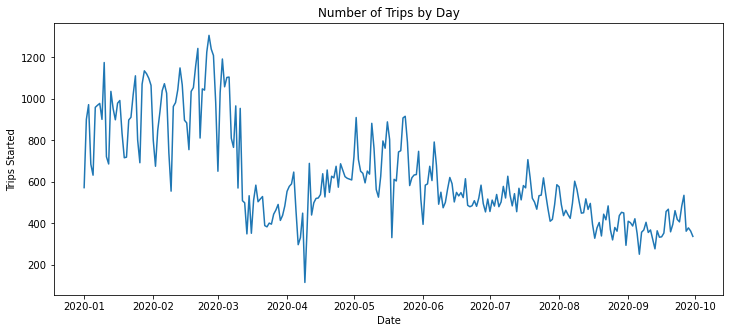

In [16]:
# Plotting Number of Trips by Date
plt.figure(figsize=(12,5))
plt.plot(np.array(date_count['Date']), date_count['Trips Started'])
plt.title('Number of Trips by Day')
plt.xlabel('Date')
plt.ylabel('Trips Started')
plt.show()    

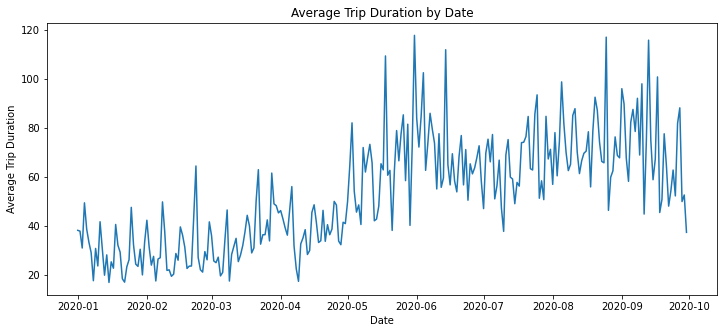

In [17]:
# Plotting average trip duration against date
plt.figure(figsize=(12,5))
plt.plot(np.array(date_count['Date']), date_count['Average_Duration'])
plt.title('Average Trip Duration by Date')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration')
plt.show()  

In [18]:
# Constructing a dataset which encompasses different attributes and count of different attributes for each month
month_result = defaultdict(list)
months_in_data = sorted(set(quarter_1_to_3.month), key=lambda x: key_finder(months, x))
for month in months_in_data:
    month_result['Month'].append(month)
    month_result['Trips'].append(list(quarter_1_to_3.month).count(month))
    month_rows = quarter_1_to_3[quarter_1_to_3.month == month]
    for bike_type in list(set(quarter_1_to_3.bike_type)):
        month_result[bike_type].append(list(month_rows.bike_type).count(bike_type))
    for passholder_type in list(set(quarter_1_to_3.passholder_type)):
        month_result[passholder_type].append(list(month_rows.passholder_type).count(passholder_type))
    for trip_cat in list(set(quarter_1_to_3.trip_route_category)):
        month_result[trip_cat].append(list(month_rows.trip_route_category).count(trip_cat))
    month_result['Popular_Starting_Station'].append(max_returner(list(month_rows.starting_station_name)))
    month_result['Popular_Ending_Station'].append(max_returner(list(month_rows.ending_station_name)))
    
month_count = pd.DataFrame(month_result, columns = list(month_result.keys()))
month_count

,Month,Trips,standard,smart,electric,Walk-up,Monthly Pass,Annual Pass,Testing,One Day Pass,One Way,Round Trip,Popular_Starting_Station,Popular_Ending_Station
0,January,28205,11870,3666,12669,4045,18679,3878,9,1594,25093,3112,Main & 1st,7th & Flower
1,February,28790,13729,3500,11561,4226,19194,3716,3,1651,25556,3234,7th & Flower,7th & Flower
2,March,19396,7554,2453,9389,2650,13687,2020,4,1035,16446,2950,7th & Flower,7th & Flower
3,April,16285,5140,2272,8873,2244,12293,531,3,1214,12152,4133,Virtual Station,Figueroa & 8th
4,May,21514,7851,5215,8448,4570,13318,1068,8,2550,15390,6124,Virtual Station,Figueroa & 8th
5,June,16403,7288,3575,5540,4000,9176,1058,5,2164,12341,4062,Virtual Station,Figueroa & 8th
6,July,16381,6975,4137,5269,4147,8704,1268,3,2259,12009,4372,Metro Bike Share Free Bikes,Metro Bike Share Free Bikes
7,August,13637,6593,2441,4603,3232,7242,1344,0,1819,10396,3241,7th & Flower,7th & Flower
8,September,11486,6844,971,3671,2321,7143,1104,0,918,9099,2387,7th & Flower,7th & Flower


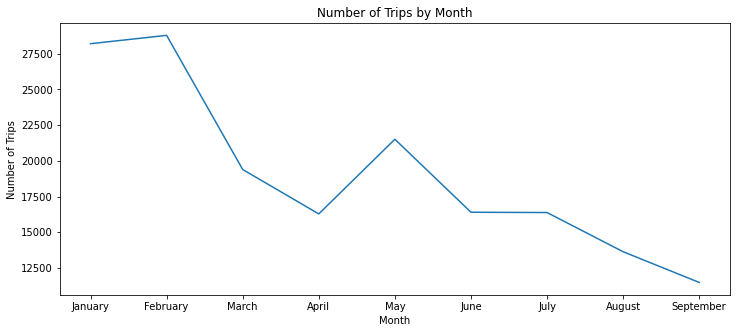

In [19]:
# Plotting Number of Trips by Month
plt.figure(figsize=(12,5))
plt.plot(np.array(month_count['Month']), month_count['Trips'])
plt.title('Number of Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.show()

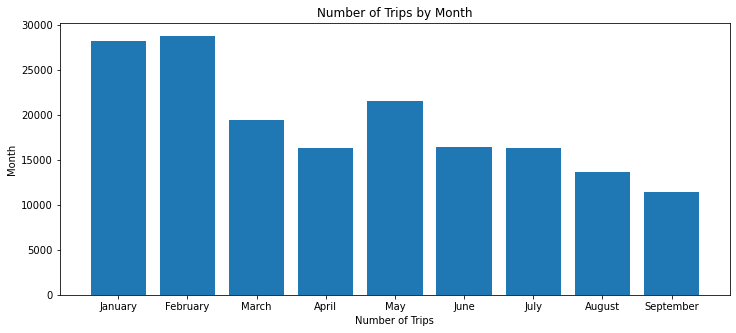

In [20]:
# Bar Graph for Number of Trips by Date
plt.figure(figsize=(12,5))
plt.bar(np.array(month_count['Month']), month_count['Trips'])
plt.title('Number of Trips by Month')
plt.ylabel('Month')
plt.xlabel('Number of Trips')
plt.show()

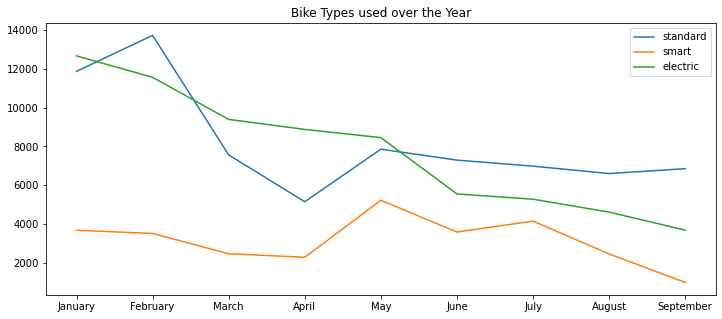

In [21]:
# Plotting Bike Types used over the year
plt.figure(figsize=(12,5))
for bike_type in list(set(quarter_1_to_3.bike_type)):
    plt.plot(np.array(month_count['Month']), month_count[bike_type], label = bike_type)
plt.title('Bike Types used over the Year')
plt.legend()
plt.show()

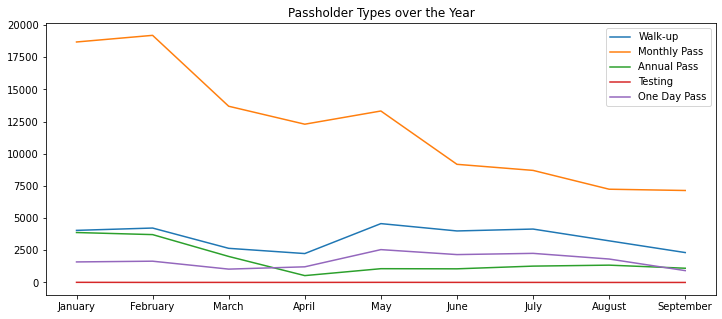

In [22]:
# Plotting Passholder Types used over the year
plt.figure(figsize=(12,5))
for passholder_type in list(set(quarter_1_to_3.passholder_type)):
    plt.plot(np.array(month_count['Month']), month_count[passholder_type], label = passholder_type)
plt.title('Passholder Types over the Year')
plt.legend()
plt.show()

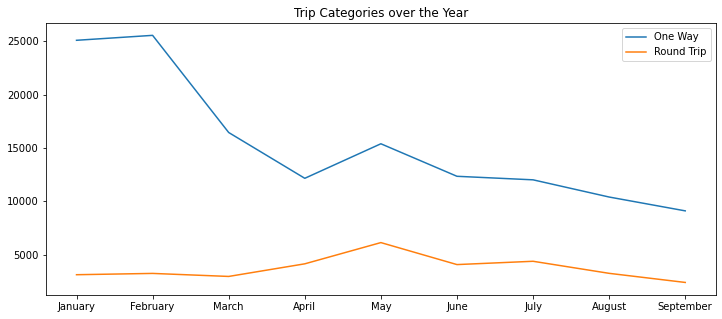

In [23]:
# Plotting Trip categories used over the year
plt.figure(figsize=(12,5))
for trip_cat in list(set(quarter_1_to_3.trip_route_category)):
    plt.plot(np.array(month_count['Month']), month_count[trip_cat], label = trip_cat)
plt.title('Trip Categories over the Year')
plt.legend()
plt.show()

In [24]:
# General Statistics
# Number of Days observed in data
day_num = len(set(date_count.Date))
print('Number of Days observed in Data: {}'.format(day_num))

# Total Number of Bike Rental Trips in 3 quarters
total_num = len(set(quarter_1_to_3.trip_id))
print('Total Number of Bike Rental Trips in 3 quarters: {}'.format(total_num))

# Total Number of Unique Bikes
bike_num = len(set(quarter_1_to_3.bike_id))
print('Total Number of Unique Bikes rented: {}'.format(bike_num))

# Average Number of Trips per Bike
avg1 = total_num / bike_num
print('Average Number of Trips per Bike: {}'.format(round(avg1, 2)))

# Average Number of Trips per Day
avg2 = total_num / day_num
print('Average Number of Trips per Day: {}'.format(round(avg2, 2)))

# Average Duration of Trips over Year
avg3 = quarter_1_to_3['duration'].mean()
print('Average Duration of Trips over year: {} minutes'.format(round(avg3, 2)))

Number of Days observed in Data: 274
Total Number of Bike Rental Trips in 3 quarters: 172097
Total Number of Unique Bikes rented: 2133
Average Number of Trips per Bike: 80.68
Average Number of Trips per Day: 628.09
Average Duration of Trips over year: 37.15 minutes


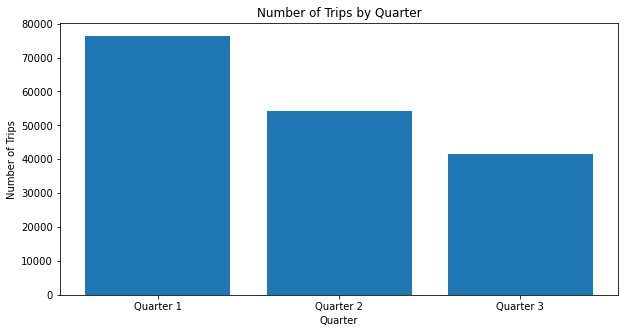

In [25]:
# Plotting number of trips by quarter
plt.figure(figsize=(10,5))
plt.title('Number of Trips by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Trips')
quarter_nums = [sum(trip_route_category_count[quarter]) for quarter in ['Quarter 1','Quarter 2','Quarter 3']]
plt.bar(['Quarter 1','Quarter 2','Quarter 3'], quarter_nums)
plt.show()

In [26]:
# Table displaying the number of days stations served as most popular starting stations
start_station_date_count = defaultdict(list)
for station in set(date_count.Popular_Starting_Station):
    start_station_date_count['Starting Station'].append(station)
    start_station_date_count['Number of Days'].append(list(date_count.Popular_Starting_Station).count(station))
start_station_date_count = pd.DataFrame(dict(start_station_date_count), columns = list(start_station_date_count.keys()))
start_station_date_count = start_station_date_count.sort_values(by = 'Number of Days', ascending = False)
start_station_date_count[start_station_date_count['Starting Station'] != 'Virtual Station']

,Starting Station,Number of Days
0,7th & Flower,106
11,Main & 1st,34
4,Figueroa & 8th,24
12,Metro Bike Share Free Bikes,22
14,Olive & 8th,7
6,Ocean Front Walk & Navy,2
13,Ocean Front Walk & North Venice,2
2,Hope & Olympic,1
3,Union Station West Portal,1
5,9th & Los Angeles,1


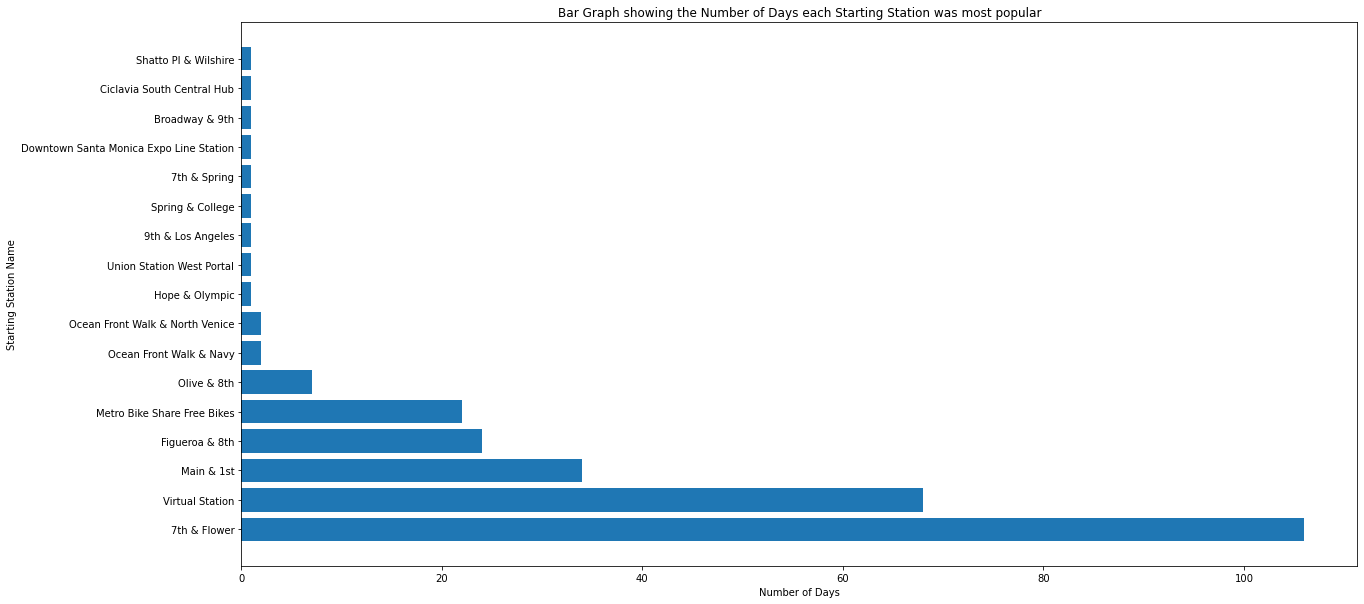

In [27]:
# Bar Graph displaying the number of days stations served as most popular starting stations
plt.figure(figsize=(20,10))
plt.barh(np.array(start_station_date_count['Starting Station']), start_station_date_count['Number of Days'])
plt.title('Bar Graph showing the Number of Days each Starting Station was most popular')
plt.ylabel('Starting Station Name')
plt.xlabel('Number of Days')
plt.show()

In [28]:
# Table displaying the number of days stations served as most popular ending stations
end_station_date_count = defaultdict(list)
for station in set(date_count.Popular_Ending_Station):
    end_station_date_count['Ending Station'].append(station)
    end_station_date_count['Number of Days'].append(list(date_count.Popular_Ending_Station).count(station))
end_station_date_count = pd.DataFrame(end_station_date_count, columns = list(end_station_date_count.keys()))
end_station_date_count = end_station_date_count.sort_values(by = 'Number of Days', ascending = False)
end_station_date_count

,Ending Station,Number of Days
10,7th & Flower,112
11,Figueroa & 8th,66
1,Metro Bike Share Free Bikes,28
0,Union Station West Portal,18
9,Virtual Station,17
3,Olive & 8th,8
6,Grand & 8th,4
7,Main & Winston,4
19,Main & 1st,4
2,Ocean Front Walk & North Venice,2


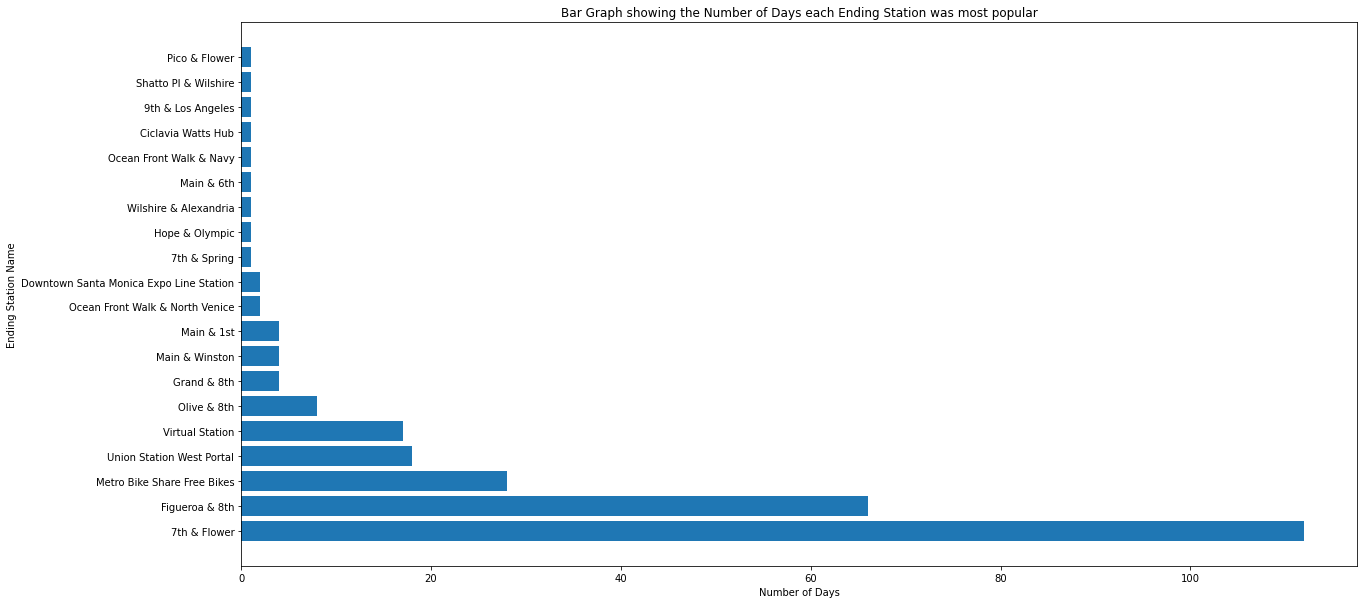

In [29]:
# Bar Graph displaying the number of days stations served as most popular ending stations
plt.figure(figsize=(20,10))
plt.barh(np.array(end_station_date_count['Ending Station']), end_station_date_count['Number of Days'])
plt.title('Bar Graph showing the Number of Days each Ending Station was most popular')
plt.ylabel('Ending Station Name')
plt.xlabel('Number of Days')
plt.show()

In [30]:
# Table displaying most popular routes in all quarters
routes = pd.DataFrame()
routes['Trip ID'] = quarter_1_to_3['trip_id']
routes['Start'] = quarter_1_to_3['starting_station_name']
routes['End'] = quarter_1_to_3['ending_station_name']
routes = routes.reset_index(drop = True)
route_list = list()
for index in routes.index:
    route = '{} to {}'.format(routes['Start'][index], routes['End'][index])
    if 'Virtual' not in route and 'Metro Bike Share Free Bikes' not in route:
        route_list.append(route)
routes_df = defaultdict(list)
for route in set(route_list):
    routes_df['Route'].append(route)
    routes_df['Number of Trips'].append(route_list.count(route))
routes_df = pd.DataFrame(dict(routes_df), columns = list(routes_df.keys()))

routes_df = routes_df.sort_values(by = 'Number of Trips', ascending = False)
routes_df = routes_df.reset_index(drop = True)
pd.set_option('display.max_colwidth', None)
top_10_routes = routes_df.head(10)
top_10_routes

,Route,Number of Trips
0,Main & 1st to Union Station West Portal,1361
1,7th & Flower to 7th & Flower,1063
2,Union Station West Portal to Main & 1st,949
3,Figueroa & 8th to Figueroa & 8th,707
4,Ocean Front Walk & North Venice to Ocean Front Walk & North Venice,651
5,Ocean Front Walk & Navy to Ocean Front Walk & Navy,643
6,Downtown Santa Monica Expo Line Station to Downtown Santa Monica Expo Line Station,536
7,7th & Flower to Figueroa & 8th,452
8,Hope & Olympic to Hope & Olympic,430
9,Vista Del Mar & Culver to Vista Del Mar & Culver,376


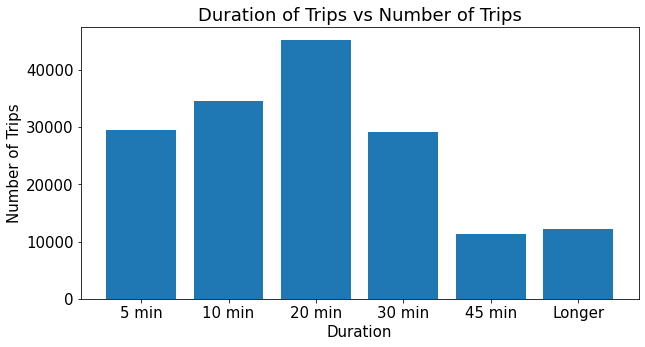

In [31]:
# Graph showing Duration of Trips vs Number of Trips
data = quarter_1_to_3.copy()
bins = [0, 5, 10, 20, 30, 45, 90]
group_tripduration = ['5 min', '10 min', '20 min', '30 min', '45 min', 'longer']
data['group_tripduration'] = pd.cut(data['duration'], bins, labels=group_tripduration)
plt.figure(figsize=(10,5))
plt.rc('font', size=15)
plt.bar(np.array(range(1,7)), data['group_tripduration'].value_counts(sort=False))
plt.xlabel('Duration')
plt.ylabel('Number of Trips')
plt.title('Duration of Trips vs Number of Trips')
plt.xticks(np.array(range(1,7)),('5 min','10 min','20 min','30 min', '45 min','Longer'))
plt.show()

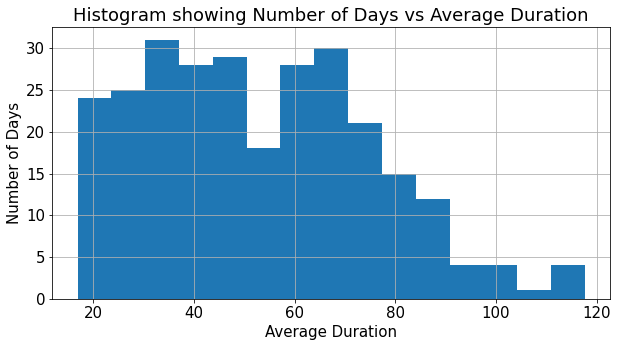

In [32]:
# Histogram showing Number of Days vs Average Duration
plt.figure(figsize=(10,5))
plt.title('Histogram showing Number of Days vs Average Duration')
plt.xlabel('Average Duration')
plt.ylabel('Number of Days')
date_count['Average_Duration'].hist(bins = 15)
plt.show()

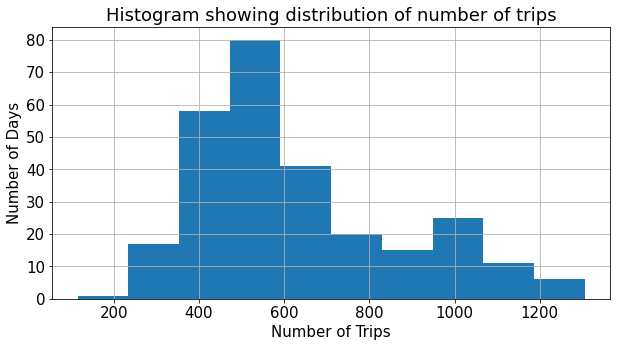

In [33]:
# Histogram showing distribution of number of trips
plt.figure(figsize=(10,5))
plt.title('Histogram showing distribution of number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Number of Days')
date_count['Trips Started'].hist(bins = 10)
plt.show()

In [34]:
# Extracting Weekend Days
Weekends = date_count[(date_count.Week_Day == 5) | (date_count.Week_Day == 6)]
Weekends = Weekends.reset_index(drop = True)
Weekends

,Date,Trips Started,Trips Ended,standard,smart,electric,Walk-up,Monthly Pass,Annual Pass,Testing,...,One Way,Round Trip,Popular_Starting_Station,Popular_Ending_Station,Average_Duration,Month,Week_Day,Week_Num,Temperature,Conditions
0,2020-01-04,685,678,207,149,335,155,400,64,0,...,573,118,7th & Flower,7th & Flower,49.356006,January,5,1,58.7,Clear
1,2020-01-05,632,636,211,82,348,132,410,68,0,...,539,102,7th & Flower,7th & Flower,38.630265,January,6,1,58.3,Clear
2,2020-01-11,721,724,231,134,371,158,439,93,1,...,621,115,7th & Flower,7th & Flower,41.644022,January,5,2,55.2,Partially cloudy
3,2020-01-12,686,689,207,164,323,135,427,61,0,...,584,110,Hope & Olympic,Ocean Front Walk & Navy,30.621037,January,6,2,56.6,Clear
4,2020-01-18,834,838,285,175,387,172,514,78,0,...,728,119,Ocean Front Walk & North Venice,7th & Flower,40.530106,January,5,3,60.1,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2020-09-13,277,268,178,31,76,75,157,19,0,...,201,84,7th & Flower,7th & Flower,115.722807,September,6,37,70.5,Clear
74,2020-09-19,468,466,272,44,160,124,258,25,0,...,361,115,7th & Flower,7th & Flower,50.754202,September,5,38,74.4,Clear
75,2020-09-20,359,360,214,44,113,111,191,24,0,...,278,93,7th & Flower,7th & Flower,77.525606,September,6,38,70.1,Clear
76,2020-09-26,535,532,350,43,153,128,283,36,0,...,429,117,7th & Flower,Main & Winston,81.774725,September,5,39,71.2,Partially cloudy


In [35]:
# Extracting Weekday Days
Weekdays = date_count[(date_count.Week_Day == 0) | (date_count.Week_Day == 1) | (date_count.Week_Day == 2)
                     | (date_count.Week_Day == 3)| (date_count.Week_Day == 4)]
Weekdays = Weekdays.reset_index(drop = True)
Weekdays

,Date,Trips Started,Trips Ended,standard,smart,electric,Walk-up,Monthly Pass,Annual Pass,Testing,...,One Way,Round Trip,Popular_Starting_Station,Popular_Ending_Station,Average_Duration,Month,Week_Day,Week_Num,Temperature,Conditions
0,2020-01-01,572,564,153,134,285,146,297,56,0,...,462,110,Ocean Front Walk & Navy,7th & Flower,38.139860,January,2,1,59.6,Clear
1,2020-01-02,901,896,362,145,399,161,512,133,1,...,787,119,7th & Flower,Union Station West Portal,37.805740,January,3,1,58.9,Clear
2,2020-01-03,972,974,417,135,428,135,605,138,1,...,881,99,Main & 1st,Union Station West Portal,30.930612,January,4,1,61.3,Clear
3,2020-01-06,959,959,423,112,434,123,677,143,0,...,879,90,Main & 1st,Union Station West Portal,33.278638,January,0,2,62.8,Clear
4,2020-01-07,969,975,442,88,451,112,673,170,0,...,888,93,Main & 1st,Union Station West Portal,29.061162,January,1,2,63.9,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2020-09-24,407,411,245,17,155,89,284,29,0,...,336,81,7th & Flower,7th & Flower,62.733813,September,3,39,73.0,Clear
192,2020-09-25,482,476,297,25,163,98,291,34,0,...,383,102,Figueroa & 8th,Figueroa & 8th,52.177320,September,4,39,71.7,Partially cloudy
193,2020-09-28,378,377,260,12,110,53,264,44,0,...,308,74,7th & Spring,7th & Spring,49.890052,September,0,40,73.1,Clear
194,2020-09-29,363,364,221,5,144,54,258,55,0,...,322,48,7th & Flower,Olive & 8th,52.562162,September,1,40,75.2,Partially cloudy


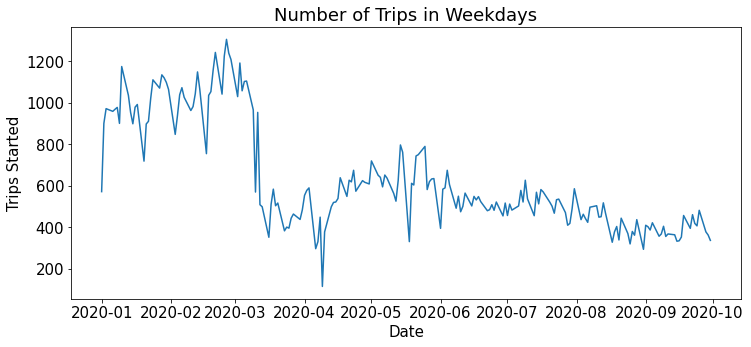

In [36]:
# Graph showing number of trips in weekdays across the 3 quarters
plt.figure(figsize=(12,5))
plt.plot(np.array(Weekdays['Date']), Weekdays['Trips Started'])
plt.title('Number of Trips in Weekdays')
plt.xlabel('Date')
plt.ylabel('Trips Started')
plt.show()

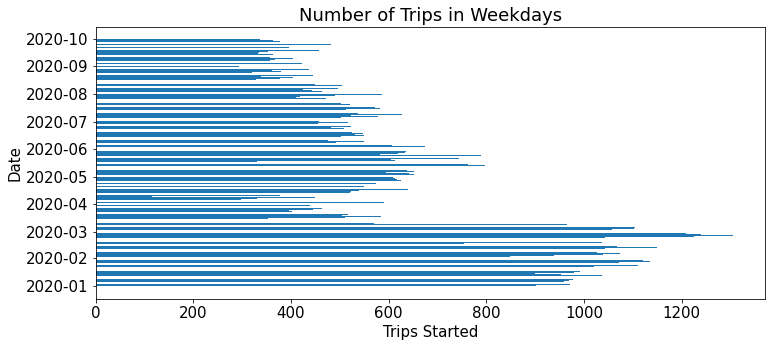

In [37]:
# Bar Graph showing number of trips in weekdays across the 3 quarters
plt.figure(figsize=(12,5))
plt.barh(np.array(Weekdays['Date']), Weekdays['Trips Started'])
plt.title('Number of Trips in Weekdays')
plt.ylabel('Date')
plt.xlabel('Trips Started')
plt.show()

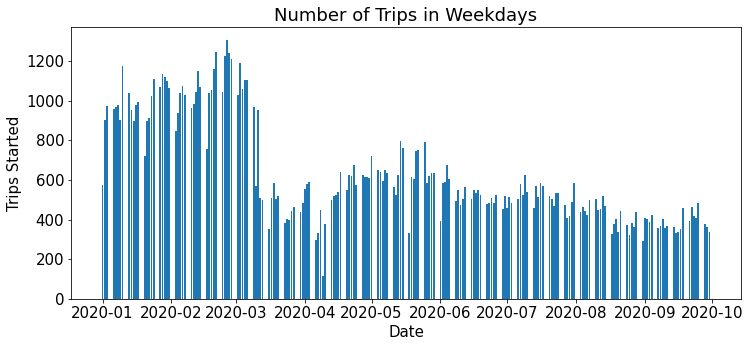

In [38]:
# Bar Graph showing number of trips in weekdays across the 3 quarters
plt.figure(figsize=(12,5))
plt.bar(np.array(Weekdays['Date']), Weekdays['Trips Started'])
plt.title('Number of Trips in Weekdays')
plt.xlabel('Date')
plt.ylabel('Trips Started')
plt.show()

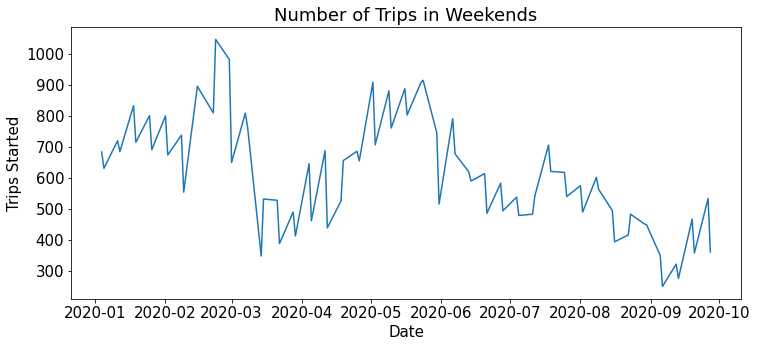

In [39]:
# Graph showing number of trips in weekend across the 3 quarters
plt.figure(figsize=(12,5))
plt.plot(np.array(Weekends['Date']), Weekends['Trips Started'])
plt.title('Number of Trips in Weekends')
plt.xlabel('Date')
plt.ylabel('Trips Started')
plt.show()

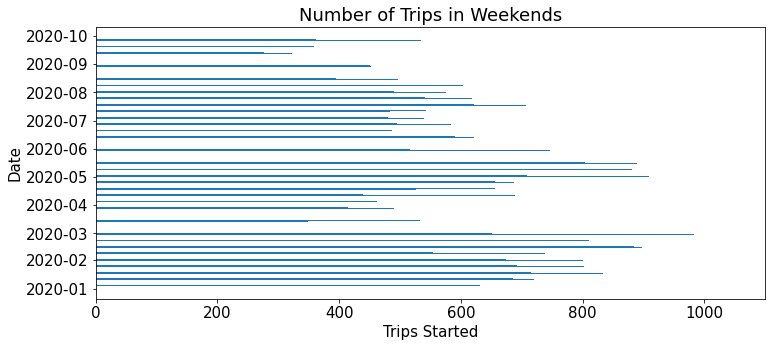

In [40]:
# Bar Graph showing number of trips in weekend across the 3 quarters
plt.figure(figsize=(12,5))
plt.barh(np.array(Weekends['Date']), Weekends['Trips Started'])
plt.title('Number of Trips in Weekends')
plt.ylabel('Date')
plt.xlabel('Trips Started')
plt.show()

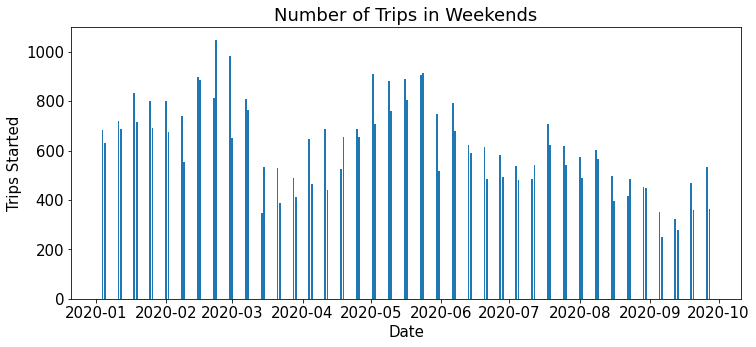

In [41]:
# Bar Graph showing number of trips in weekend across the 3 quarters
plt.figure(figsize=(12,5))
plt.bar(np.array(Weekends['Date']), Weekends['Trips Started'])
plt.title('Number of Trips in Weekends')
plt.xlabel('Date')
plt.ylabel('Trips Started')
plt.show()

In [42]:
# Getting Number of Trips by Day of Week
days_count = defaultdict(list)
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
for day_num in sorted(set(date_count.Week_Day)):
    days_count['Day'].append(days[day_num])
    days_count['Number of Trips'].append(date_count[date_count.Week_Day == day_num]['Trips Started'].sum())
days_count = pd.DataFrame(days_count, columns = list(days_count.keys()))
days_count

,Day,Number of Trips
0,Monday,22570
1,Tuesday,24039
2,Wednesday,25179
3,Thursday,25518
4,Friday,26635
5,Saturday,25521
6,Sunday,22635


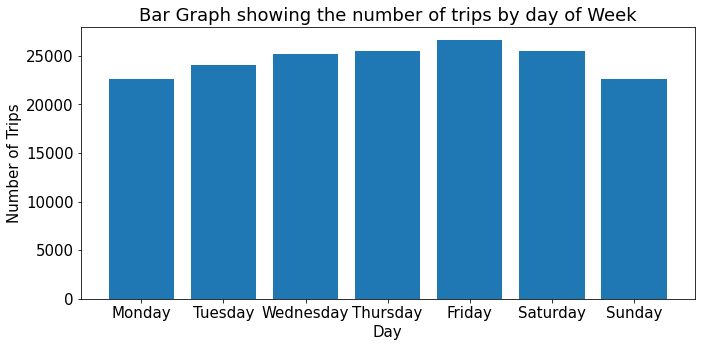

In [43]:
# Bar Graph displaying the number of trips by day of Week
plt.figure(figsize=(11,5))
plt.bar(np.array(days_count['Day']), days_count['Number of Trips'])
plt.title('Bar Graph showing the number of trips by day of Week')
plt.ylabel('Number of Trips')
plt.xlabel('Day')
plt.show()

In [44]:
# Average Number of Trips started in Weekdays
avg_weekday = round(Weekdays['Trips Started'].mean(),2)
print('Average Number of Trips started in Weekdays: {}'.format(avg_weekday))

# Average Number of Trips started in Weekends
avg_weekend = round(Weekends['Trips Started'].mean(),2)
print('Average Number of Trips started in Weekdays: {}'.format(avg_weekend))

# Maximum Trips started in Weekdays
max_weekday = Weekdays['Trips Started'].max()
print('Maximum Trips started in Weekdays: {}'.format(max_weekday))

# Maximum Trips started in Weekends
max_weekend = Weekends['Trips Started'].max()
print('Maximum Trips started in Weekends: {}'.format(max_weekend))

# Minimum Trips started in Weekdays
min_weekday = Weekdays['Trips Started'].min()
print('Minimum Trips started in Weekdays: {}'.format(min_weekday))

# Maximum Trips started in Weekends
min_weekend = Weekends['Trips Started'].min()
print('Minimum Trips started in Weekends: {}'.format(min_weekend))

# Total Number of Trips started in Weekdays
total_weekday = Weekdays['Trips Started'].sum()
print('Total Number of Trips started in Weekdays: {}'.format(total_weekday))

# Total Number of Trips started in Weekends
total_weekend = Weekends['Trips Started'].sum()
print('Total Number of Trips started in Weekends: {}'.format(total_weekend))

Average Number of Trips started in Weekdays: 632.35
Average Number of Trips started in Weekdays: 617.38
Maximum Trips started in Weekdays: 1306
Maximum Trips started in Weekends: 1048
Minimum Trips started in Weekdays: 115
Minimum Trips started in Weekends: 251
Total Number of Trips started in Weekdays: 123941
Total Number of Trips started in Weekends: 48156


In [45]:
# Table showing most popular starting stations in weekdays
station_date_count_weekdays = defaultdict(list)
for station in set(Weekdays.Popular_Starting_Station):
    station_date_count_weekdays['Station'].append(station)
    station_date_count_weekdays['Number of Days'].append(list(Weekdays.Popular_Starting_Station).count(station))
station_date_count_weekdays = pd.DataFrame(dict(station_date_count_weekdays), columns = list(station_date_count_weekdays.keys()))
station_date_count_weekdays

,Station,Number of Days
0,7th & Flower,73
1,7th & Spring,1
2,Union Station West Portal,1
3,Figueroa & 8th,19
4,Ocean Front Walk & Navy,1
5,Shatto Pl & Wilshire,1
6,Main & 1st,34
7,Metro Bike Share Free Bikes,11
8,Olive & 8th,5
9,Virtual Station,50


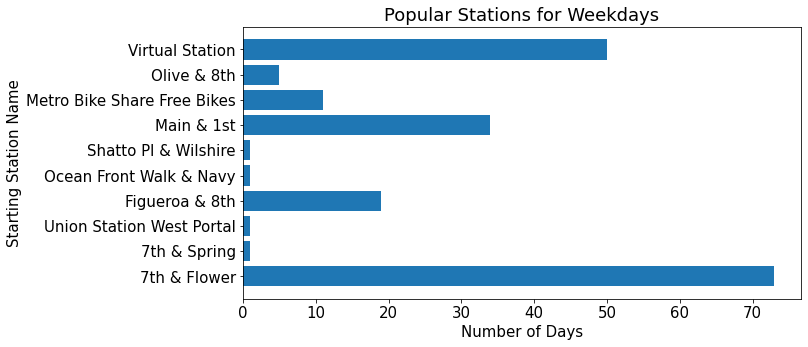

In [46]:
# Bar Chart for most popular station in Weekdays 
plt.figure(figsize=(10,5))
plt.barh(np.array(station_date_count_weekdays['Station']), station_date_count_weekdays['Number of Days'])
plt.title('Popular Stations for Weekdays')
plt.ylabel('Starting Station Name')
plt.xlabel('Number of Days')
plt.show()

In [47]:
# Table showing most popular starting stations in weekends
station_date_count_weekends = defaultdict(list)
for station in set(Weekends.Popular_Starting_Station):
    station_date_count_weekends['Station'].append(station)
    station_date_count_weekends['Number of Days'].append(list(Weekends.Popular_Starting_Station).count(station))
station_date_count_weekends = pd.DataFrame(dict(station_date_count_weekends), columns = list(station_date_count_weekends.keys()))
station_date_count_weekends

,Station,Number of Days
0,7th & Flower,33
1,Hope & Olympic,1
2,9th & Los Angeles,1
3,Figueroa & 8th,5
4,Spring & College,1
5,Ocean Front Walk & Navy,1
6,Downtown Santa Monica Expo Line Station,1
7,Broadway & 9th,1
8,Metro Bike Share Free Bikes,11
9,Ocean Front Walk & North Venice,2


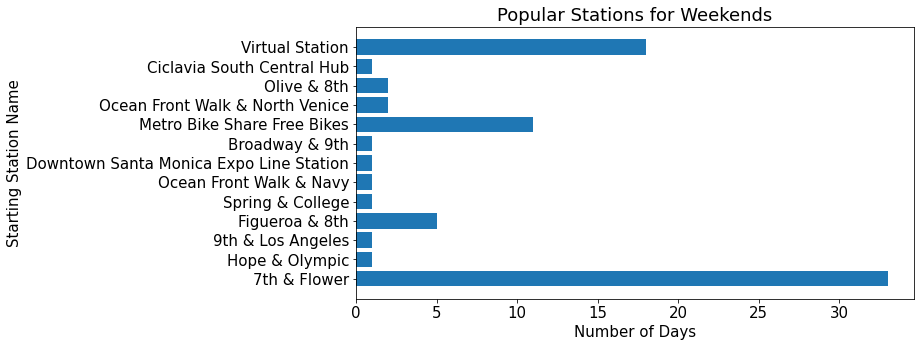

In [48]:
# Bar Chart for most popular station in Weekends
plt.figure(figsize=(10,5))
plt.barh(np.array(station_date_count_weekends['Station']), station_date_count_weekends['Number of Days'])
plt.title('Popular Stations for Weekends')
plt.ylabel('Starting Station Name')
plt.xlabel('Number of Days')
plt.show()

In [49]:
# Trips by Week Number in 2020
week_count = defaultdict(list)
for week_num in sorted(set(date_count['Week_Num'])):
    week_rows = date_count[date_count.Week_Num == week_num]
    week_count['Week'].append('Week {}'.format(week_num))
    week_count['Trips Started'].append(week_rows['Trips Started'].sum())
    week_count['Trips Ended'].append(week_rows['Trips Ended'].sum())
week_count = pd.DataFrame(week_count, columns = list(week_count.keys()))
week_count

,Week,Trips Started,Trips Ended
0,Week 1,3762,3748
1,Week 2,6389,6391
2,Week 3,6409,6409
3,Week 4,6154,6154
4,Week 5,6967,6963
5,Week 6,6219,6225
6,Week 7,6986,6985
7,Week 8,7104,7101
8,Week 9,7656,7663
9,Week 10,7064,7057


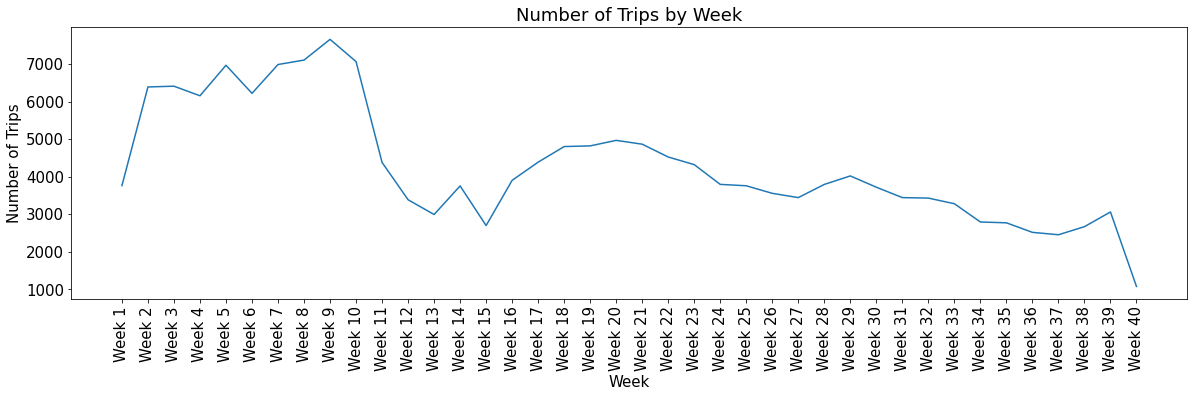

In [50]:
# Plotting number of trips against week in the year
plt.figure(figsize=(20,5))
plt.plot(np.array(week_count['Week']), week_count['Trips Started'])
plt.xticks(rotation='vertical')
plt.title('Number of Trips by Week')
plt.xlabel('Week')
plt.ylabel('Number of Trips')
plt.show()  

In [51]:
# Splitting start_time attribute into separate date and time attributes
quarter_1_to_3['start_time'] = pd.to_datetime(quarter_1_to_3['start_time'])
quarter_1_to_3['date'] = quarter_1_to_3['start_time'].dt.date
quarter_1_to_3['time'] = quarter_1_to_3['start_time'].dt.time

# Splitting time into the hour of the trip
quarter_1_to_3['time'] = quarter_1_to_3['time'].apply(lambda x: x.hour)

# Finding the frequency of each hour 
hour_time = quarter_1_to_3.groupby(['time']).size().reset_index(name='counts')

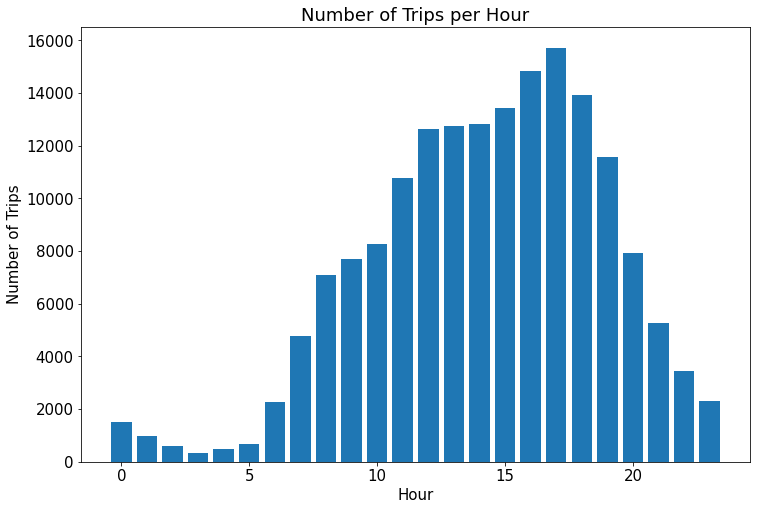

In [52]:
# Chart showing number of trips in each hour
plt.figure(figsize=(12,8))
plt.bar(hour_time.index,hour_time['counts'])
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Hour', y=1)
plt.show()

In [53]:
# Rental frequency in different weather conditions
freq_date = quarter_1_to_3.groupby(['date']).size().reset_index(name='counts')

# Merge freq_date with weather data
weather_vs_date = pd.concat([weather_data,freq_date], axis=1, sort=False)

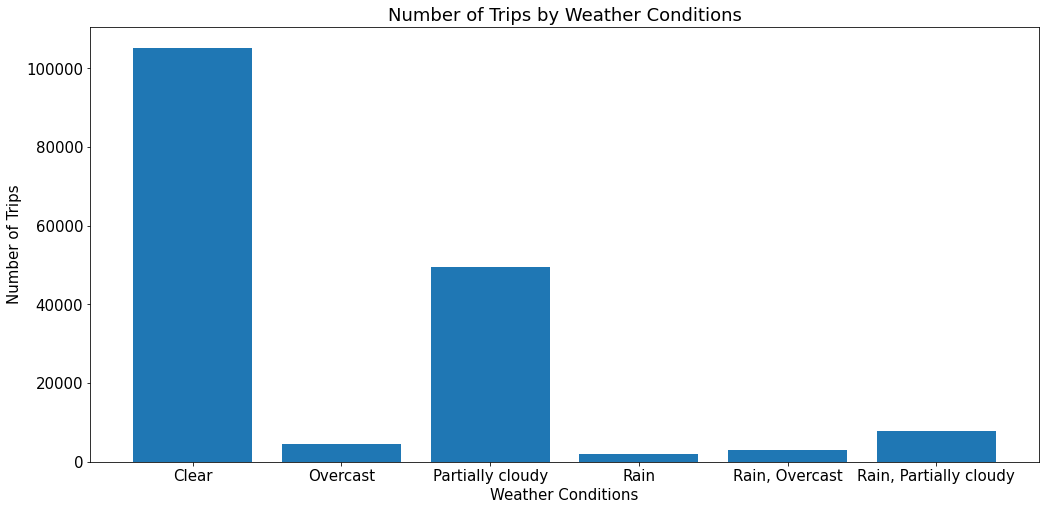

In [54]:
#Plot Showing Number of Trips in different weather conditions
weather_vs_date = weather_vs_date.groupby('Conditions').sum()
plt.figure(figsize=(17,8))
plt.bar(weather_vs_date.index, weather_vs_date['counts'])
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Weather Conditions', y=1)
plt.show()

In [55]:
# Finding total durations in weather conditions
# Total rental time in each day
dura_sum = quarter_1_to_3.groupby(['date'])['duration'].sum().reset_index()

# Merging weather data and sum of duration 
weather_vs_dura = pd.concat([weather_data,dura_sum], axis=1, sort=False)

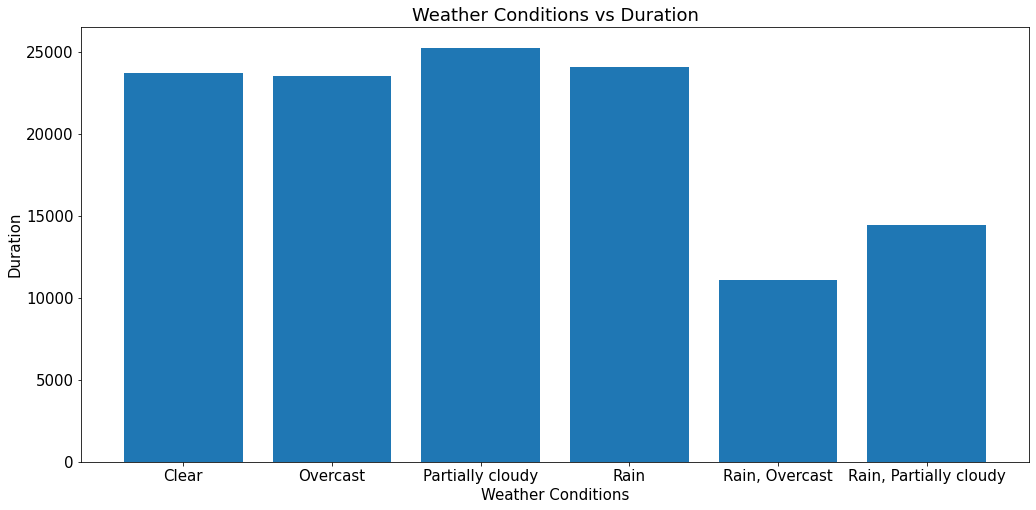

In [56]:
# Plot showing average duration vs Weather Condition
weather_vs_dura = weather_vs_dura.groupby('Conditions').mean()
plt.figure(figsize=(17,8))
plt.bar(weather_vs_dura.index,weather_vs_dura['duration'])
plt.xlabel('Weather Conditions')
plt.ylabel('Duration')
plt.title('Weather Conditions vs Duration', y=1)
plt.show()

In [57]:
# Analysis Method 2
q3 = pd.read_csv("metro-bike-2020-q3.csv")
q2 = pd.read_csv("metro-bike-2020-q2.csv")
q1 = pd.read_csv("metro-bike-2020-q1.csv")
station = pd.read_csv('metro-bike-share-stations-2020-10-01.csv')
weather = pd.read_csv("weather.csv")
q3 = pd.DataFrame(q3)
q2 = pd.DataFrame(q2)
q1 = pd.DataFrame(q1)
station = pd.DataFrame(station)
weather = pd.DataFrame(weather)
q = pd.concat([q1,q2,q3])

In [58]:
q['start_time'] = pd.to_datetime(q['start_time']).dt.floor('d')
q['end_time'] = pd.to_datetime(q['end_time']).dt.floor('d')

In [59]:
# Changing Weather Format
weather = weather.rename(columns={'Date':'start_time'})
weather['start_time']= pd.to_datetime(weather.start_time)
weather['start_time']= weather['start_time'].dt.strftime('%Y-%m-%d')

In [60]:
# Run Only Once
q.drop(['start_lat','start_lon','end_lat','end_lon'], axis=1,inplace = True)

In [61]:
# Merging weather, station and shared bike data
q['start_time'] = pd.to_datetime(q.start_time)
weather['start_time'] = pd.to_datetime(weather.start_time)
q_weather = pd.merge(q, weather, on = ['start_time'])
station = station.rename(columns={'Station_ID':'start_station'})
q_complete = pd.merge(q_weather, station, on = ['start_station'])
q_complete['month'] = pd.DatetimeIndex(q_complete['start_time']).month
q_complete['day'] = pd.DatetimeIndex(q_complete['start_time']).day

In [62]:
q_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172097 entries, 0 to 172096
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trip_id                172097 non-null  int64         
 1   duration               172097 non-null  int64         
 2   start_time             172097 non-null  datetime64[ns]
 3   end_time               172097 non-null  datetime64[ns]
 4   start_station          172097 non-null  int64         
 5   end_station            172097 non-null  int64         
 6   bike_id                172097 non-null  int64         
 7   plan_duration          172097 non-null  int64         
 8   trip_route_category    172097 non-null  object        
 9   passholder_type        172097 non-null  object        
 10  bike_type              172097 non-null  object        
 11  Minimum Temperature    172097 non-null  float64       
 12  Maximum Temperature    172097 non-null  floa

In [63]:
# Total Stations ---> 222
tot_stations = len(q_complete.Station_Name.unique())
print('Total Number of Stations: {}'.format(tot_stations))

# Total Regions ---> 5
tot_regions = len(q_complete.iloc[:,21].unique())
print('Total Number of Regions: {}'.format(tot_regions))

# Total Rentals ---> 172097
tot_rentals = len(q_complete.trip_id.unique())
print('Total Number of Rentals: {}'.format(tot_rentals))

# Total Bikes ---> 2133 
tot_bikes = len(q_complete.bike_id.unique())
print('Total Number of Bikes: {}'.format(tot_bikes))

Total Number of Stations: 222
Total Number of Regions: 5
Total Number of Rentals: 172097
Total Number of Bikes: 2133


In [64]:
# Rentals except virtual stations data
q_1 = q_complete.loc[q_complete.Station_Name != 'Virtual Station']

In [65]:
q_region = q_1.groupby(['Region '])
q_region.size()

Region 
DTLA               110812
Free Bikes           2883
North Hollywood      2678
Westside            14048
dtype: int64

In [66]:
# Bike by each region 
pd.DataFrame(q_region['bike_id'].nunique())

,bike_id
Region,
DTLA,1438
Free Bikes,486
North Hollywood,208
Westside,528


In [67]:
# Frequency on each bike 
# Top 10% popular bike used are in DTLA
a = q_complete.groupby(["bike_id"]).size().nlargest(210)
pd.DataFrame(a)

,0
bike_id,
19941,1097
18942,1037
19803,1003
16540,994
16811,960
...,...
20044,104
6493,103
15140,103


In [68]:
# Function to return station_id based on station name
def station_id_finder(name):
    return int(list(stations[stations.Station_Name == name]['Station_ID'])[0])
pd.options.mode.chained_assignment = None  # default='warn'

In [69]:
# Dataset prepration for modelling
import seaborn as sns
date_count2 = date_count[['Average_Duration','Week_Day', 'Conditions','Week_Num']]
date_count2['Temperature'] = [float(x) for x in list(date_count['Temperature'])]
date_count2['Trips'] = date_count['Trips Started']
date_count2['Month'] = [key_finder(months, x) for x in list(date_count['Month'])]
date_count2['Station'] = [station_id_finder(x) for x in list(date_count['Popular_Starting_Station'])]
conditions_dict = dict()
for i in set(date_count.Conditions):
    conditions_dict[i] = sorted(set(date_count.Conditions)).index(i)

date_count2['Conditions'] = [conditions_dict[x] for x in list(date_count['Conditions'])]
date_count2

,Average_Duration,Week_Day,Conditions,Week_Num,Temperature,Trips,Month,Station
0,38.139860,2,0,1,59.6,572,1,4214
1,37.805740,3,0,1,58.9,901,1,3005
2,30.930612,4,0,1,61.3,972,1,3030
3,49.356006,5,0,1,58.7,685,1,3005
4,38.630265,6,0,1,58.3,632,1,3005
...,...,...,...,...,...,...,...,...
269,81.774725,5,2,39,71.2,535,9,3005
270,88.114058,6,2,39,72.2,362,9,3005
271,49.890052,0,0,40,73.1,378,9,3031
272,52.562162,1,2,40,75.2,363,9,3005


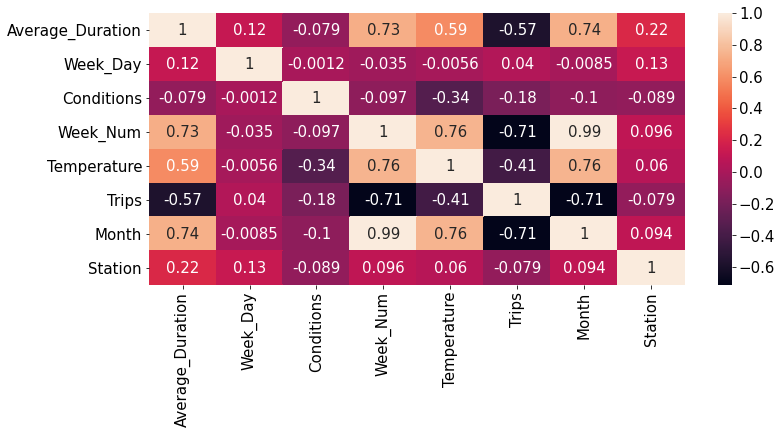

In [70]:
# Heatmap for variables used for modelling
plt.figure(figsize=(12,5))
sns.heatmap(date_count2.corr(),annot = True)
plt.show()

In [71]:
# Linear Regression Modelling
import sklearn
from sklearn.linear_model import LinearRegression
y = np.array(date_count2['Trips'])
x = list()
for index in date_count2.index:
    dur = date_count2['Average_Duration'][index]
    month = date_count2['Month'][index]
    temp = date_count2['Temperature'][index]    
    x.append([dur, month, temp])
    
x = np.array(x)
model = LinearRegression().fit(x, y)

print('Linear Regression: Coefficient of Determination:', model.score(x, y))
print('Linear Regression: Intercept:', model.intercept_)
print('Linear Regression: Slope(s):', model.coef_)

pred_lin_regression = list(model.predict(x))
date_count2['Predicted Trips'] = [int(round(x)) for x in list(pred_lin_regression)]
date_count2['Accurate - Prediction'] = date_count2['Trips'] - date_count2['Predicted Trips']

Linear Regression: Coefficient of Determination: 0.5502091001164389
Linear Regression: Intercept: 380.1453386535637
Linear Regression: Slope(s): [ -1.31465495 -78.26284064  10.54253354]


In [72]:
# Calculating Percentage Difference between Predicted Value and Actual Value
date_count2['Percent Change'] = ((date_count2['Predicted Trips'] - date_count2['Trips']) / date_count2['Trips']) * 100
date_count2

,Average_Duration,Week_Day,Conditions,Week_Num,Temperature,Trips,Month,Station,Predicted Trips,Accurate - Prediction,Percent Change
0,38.139860,2,0,1,59.6,572,1,4214,880,-308,53.846154
1,37.805740,3,0,1,58.9,901,1,3005,873,28,-3.107658
2,30.930612,4,0,1,61.3,972,1,3030,907,65,-6.687243
3,49.356006,5,0,1,58.7,685,1,3005,856,-171,24.963504
4,38.630265,6,0,1,58.3,632,1,3005,866,-234,37.025316
...,...,...,...,...,...,...,...,...,...,...,...
269,81.774725,5,2,39,71.2,535,9,3005,319,216,-40.373832
270,88.114058,6,2,39,72.2,362,9,3005,321,41,-11.325967
271,49.890052,0,0,40,73.1,378,9,3031,381,-3,0.793651
272,52.562162,1,2,40,75.2,363,9,3005,399,-36,9.917355


In [73]:
# Rows which had predicted values in range of 10% of the actual value
date_count2[(date_count2['Percent Change'] < 10) & (date_count2['Percent Change'] > -10)]

,Average_Duration,Week_Day,Conditions,Week_Num,Temperature,Trips,Month,Station,Predicted Trips,Accurate - Prediction,Percent Change
1,37.805740,3,0,1,58.9,901,1,3005,873,28,-3.107658
2,30.930612,4,0,1,61.3,972,1,3030,907,65,-6.687243
5,33.278638,0,0,2,62.8,959,1,3030,920,39,-4.066736
6,29.061162,1,0,2,63.9,969,1,3030,937,32,-3.302374
7,17.586137,2,0,2,58.0,978,1,3030,890,88,-8.997955
...,...,...,...,...,...,...,...,...,...,...,...
258,58.785294,1,0,38,72.8,333,9,3005,366,-33,9.909910
260,100.721180,3,3,38,74.9,353,9,3005,333,20,-5.665722
261,45.410367,4,0,38,77.6,457,9,3005,434,23,-5.032823
271,49.890052,0,0,40,73.1,378,9,3031,381,-3,0.793651


In [74]:
# Decision Tree Modelling
import sklearn
import sklearn.tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

data = date_count2[['Temperature','Trips','Average_Duration','Month']]
labels_y = data.Trips.copy()
data_x = data.drop(labels=['Trips'], axis=1)
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
dt_model = regr.fit(data_x, labels_y)

In [75]:
print(dt_model.feature_importances_)
print(data_x.columns)

[0.04088422 0.12276553 0.83635025]
Index(['Temperature', 'Average_Duration', 'Month'], dtype='object')


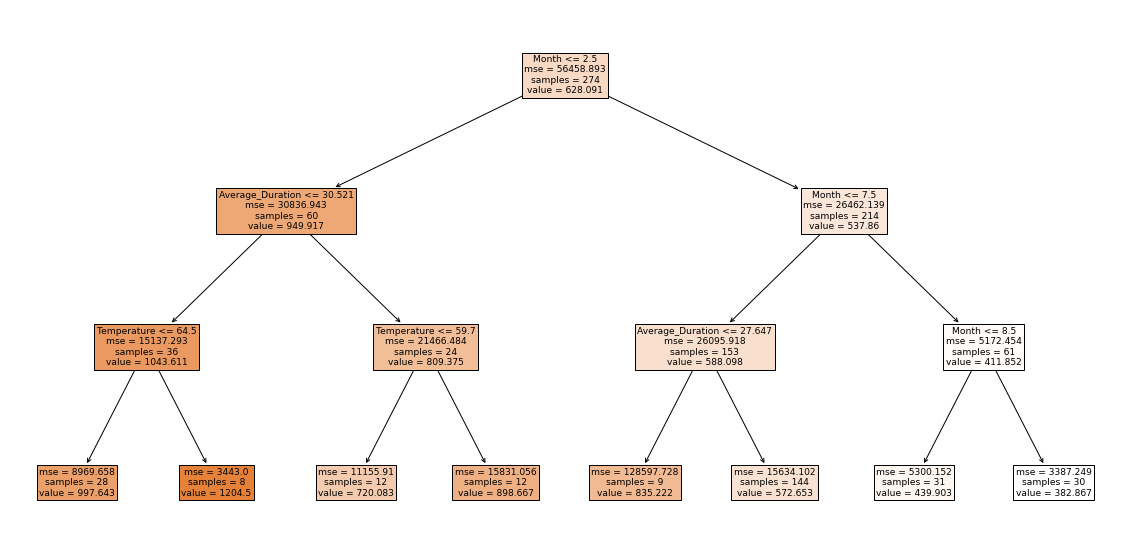

In [76]:
# Visualizing tree
plt.figure(figsize=(20,10))
plt.title('Decision Tree for Number of Trips')
tree.plot_tree(regr, feature_names = list(data_x.columns), class_names = ['Number of Trips'], filled=True)
plt.show()

In [77]:
pred_dt = list(dt_model.predict(x))
data['Predicted Trips'] = [int(round(x)) for x in list(pred_dt)]
data['Accurate - Prediction'] = data['Trips'] - data['Predicted Trips']

In [78]:
data['Percent Change'] = ((data['Predicted Trips'] - data['Trips']) / data['Trips']) * 100
data

,Temperature,Trips,Average_Duration,Month,Predicted Trips,Accurate - Prediction,Percent Change
0,59.6,572,38.139860,1,383,189,-33.041958
1,58.9,901,37.805740,1,383,518,-57.491676
2,61.3,972,30.930612,1,383,589,-60.596708
3,58.7,685,49.356006,1,383,302,-44.087591
4,58.3,632,38.630265,1,383,249,-39.398734
...,...,...,...,...,...,...,...
269,71.2,535,81.774725,9,383,152,-28.411215
270,72.2,362,88.114058,9,383,-21,5.801105
271,73.1,378,49.890052,9,383,-5,1.322751
272,75.2,363,52.562162,9,383,-20,5.509642


In [79]:
data[(data['Percent Change'] < 10) & (data['Percent Change'] > -10)]

,Temperature,Trips,Average_Duration,Month,Predicted Trips,Accurate - Prediction,Percent Change
73,58.2,349,28.101124,3,383,-34,9.742120
75,58.6,352,37.541076,3,383,-31,8.806818
81,60.8,389,62.883544,3,383,6,-1.542416
82,60.9,383,32.496104,3,383,0,0.000000
83,58.5,401,36.344828,3,383,18,-4.488778
84,60.2,396,36.365915,3,383,13,-3.282828
88,60.1,414,48.925481,3,383,31,-7.487923
100,57.0,378,32.591623,4,383,-5,1.322751
152,70.8,395,83.936430,6,383,12,-3.037975
209,66.9,410,50.661905,7,383,27,-6.585366


In [80]:
date_count3 = date_count[['Trips Started','Temperature','Month','Week_Day','Average_Duration']]
date_count3['Trips_Bin'] = pd.cut(date_count3['Trips Started'],[0, 250, 500, 750, 1000, 1250, 1500], 
                                  labels = ['0 - 250', '250 - 500', '500 - 750','750 - 1000', '1000 - 1250','1250 - 1500'])
date_count3['Month'] = [key_finder(months, x) for x in list(date_count3['Month'])]

In [81]:
# Logistic Regression Modelling
from sklearn.linear_model import LogisticRegression
logit_y = list(np.array(date_count3['Trips_Bin']))
model1 = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, logit_y)
model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(x, y)

In [82]:
date_count3['Predict'] = list(model1.predict(x))
print('Logistic Regression (Binned): Coefficient of Determination: {}'.format(model1.score(x, logit_y)))
print('Logistic Regression (Not Binned): Coefficient of Determination: {}'.format(model2.score(x, y)))

Logistic Regression (Binned): Coefficient of Determination: 0.5875912408759124
Logistic Regression (Not Binned): Coefficient of Determination: 0.12408759124087591


In [83]:
# Rows with exact matches for binned
date_count3[date_count3['Predict'] == date_count3['Trips_Bin']]

,Trips Started,Temperature,Month,Week_Day,Average_Duration,Trips_Bin,Predict
1,901,58.9,1,3,37.805740,750 - 1000,750 - 1000
2,972,61.3,1,4,30.930612,750 - 1000,750 - 1000
5,959,62.8,1,0,33.278638,750 - 1000,750 - 1000
8,901,57.4,1,3,30.749175,750 - 1000,750 - 1000
9,1175,56.1,1,4,23.603902,1000 - 1250,1000 - 1250
...,...,...,...,...,...,...,...
268,482,71.7,9,4,52.177320,250 - 500,250 - 500
270,362,72.2,9,6,88.114058,250 - 500,250 - 500
271,378,73.1,9,0,49.890052,250 - 500,250 - 500
272,363,75.2,9,1,52.562162,250 - 500,250 - 500


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(logit_y, model1.predict(x))
cm_list = [list(x) for x in list(cm)]
cm_dict = dict()
index_dict = dict()
ranges = ['0 - 250', '1000 - 1250','1250 - 1500', '250 - 500', '500 - 750','750 - 1000',]

for i in cm_list:
    for r in ranges:
        if ranges.index(r) == cm_list.index(i):
            cm_dict[r] = i
            index_dict[r] = ranges.index(r)
print('Confusion Matrix: \n{}'.format(cm))
accuracy_dict = dict()
accuracy = 0

for r in ranges:
    accurate = list(date_count3['Trips_Bin']).count(r)
    predict = cm_dict[r][index_dict[r]]
    accuracy += predict
    stratified_accuracy = round(((predict/accurate) * 100), 2)
    print('Stratified Accuracy of Bin [{}): {}%'.format(r, stratified_accuracy))
accuracy = round((accuracy / len(list(date_count3['Trips_Bin'])) * 100), 2)
print('Overall Accuracy: {}%'.format(accuracy))

Confusion Matrix: 
[[ 1  0  0  0  0  0]
 [ 0 20  0  0  8  1]
 [ 0  1  0  0  0  0]
 [ 0  0  0 68 27  0]
 [ 0  0  0 37 64  8]
 [ 0  9  0  0 22  8]]
Stratified Accuracy of Bin [0 - 250): 100.0%
Stratified Accuracy of Bin [1000 - 1250): 68.97%
Stratified Accuracy of Bin [1250 - 1500): 0.0%
Stratified Accuracy of Bin [250 - 500): 71.58%
Stratified Accuracy of Bin [500 - 750): 58.72%
Stratified Accuracy of Bin [750 - 1000): 20.51%
Overall Accuracy: 58.76%


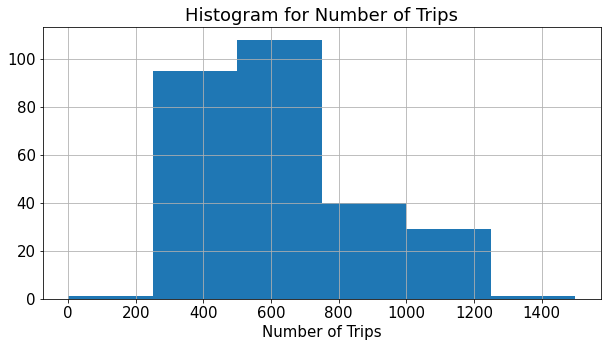

In [85]:
plt.figure(figsize=(10,5))
plt.title('Histogram for Number of Trips')
plt.xlabel('Number of Trips')
date_count3['Trips Started'].hist(bins = [0, 250, 500, 750, 1000, 1250, 1500])
plt.show()